# Lab 01: MỐI QUAN HỆ CỦA DỮ LIỆU
# Môn: Trực Quan Hóa Dữ Liệu

## Danh sách thành viên:

---
**Họ và tên:** Nguyễn Tất Trường

**MSSV:** 19127082

---
**Họ và tên:** Nguyễn Hữu Tuấn

**MSSV:** 19127083

---
**Họ và tên:** Chung Thế Thọ

**MSSV:** 19127562

---
**Họ và tên:** Trần Quốc Việt

**MSSV:** 19127630

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lab-01:-MỐI-QUAN-HỆ-CỦA-DỮ-LIỆU" data-toc-modified-id="Lab-01:-MỐI-QUAN-HỆ-CỦA-DỮ-LIỆU-1">Lab 01: MỐI QUAN HỆ CỦA DỮ LIỆU</a></span></li><li><span><a href="#Môn:-Trực-Quan-Hóa-Dữ-Liệu" data-toc-modified-id="Môn:-Trực-Quan-Hóa-Dữ-Liệu-2">Môn: Trực Quan Hóa Dữ Liệu</a></span><ul class="toc-item"><li><span><a href="#Danh-sách-thành-viên:" data-toc-modified-id="Danh-sách-thành-viên:-2.1">Danh sách thành viên:</a></span></li></ul></li><li><span><a href="#Import-các-thư-viện-cần-thiết" data-toc-modified-id="Import-các-thư-viện-cần-thiết-3">Import các thư viện cần thiết</a></span></li><li><span><a href="#Thu-thập-dữ-liệu" data-toc-modified-id="Thu-thập-dữ-liệu-4">Thu thập dữ liệu</a></span></li><li><span><a href="#Khám-phá-dữ-liệu" data-toc-modified-id="Khám-phá-dữ-liệu-5">Khám phá dữ liệu</a></span><ul class="toc-item"><li><span><a href="#Đọc-dữ-liệu-của-ngày-đầu-tiên-từ-file-csv-vào-dataframe" data-toc-modified-id="Đọc-dữ-liệu-của-ngày-đầu-tiên-từ-file-csv-vào-dataframe-5.1">Đọc dữ liệu của ngày đầu tiên từ file csv vào dataframe</a></span></li><li><span><a href="#Mỗi-cột-có-ý-nghĩa-gì?" data-toc-modified-id="Mỗi-cột-có-ý-nghĩa-gì?-5.2">Mỗi cột có ý nghĩa gì?</a></span></li><li><span><a href="#Số-dòng,-số-cột-của-tập-dữ-liệu" data-toc-modified-id="Số-dòng,-số-cột-của-tập-dữ-liệu-5.3">Số dòng, số cột của tập dữ liệu</a></span></li><li><span><a href="#Mỗi-dòng-có-ý-nghĩa-gì?-Có-vấn-đề-các-dòng-có-ý-nghĩa-khác-nhau-không?" data-toc-modified-id="Mỗi-dòng-có-ý-nghĩa-gì?-Có-vấn-đề-các-dòng-có-ý-nghĩa-khác-nhau-không?-5.4">Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?</a></span></li><li><span><a href="#Dữ-liệu-có-bị-lặp-không" data-toc-modified-id="Dữ-liệu-có-bị-lặp-không-5.5">Dữ liệu có bị lặp không</a></span></li><li><span><a href="#Kiểu-dữ-liệu-của-từng-cột" data-toc-modified-id="Kiểu-dữ-liệu-của-từng-cột-5.6">Kiểu dữ liệu của từng cột</a></span></li><li><span><a href="#Phân-tích-rõ-hơn-các-cột-có-kiểu-object" data-toc-modified-id="Phân-tích-rõ-hơn-các-cột-có-kiểu-object-5.7">Phân tích rõ hơn các cột có kiểu object</a></span></li><li><span><a href="#Các-cột-có-bị-thiếu-dữ-liệu-không?" data-toc-modified-id="Các-cột-có-bị-thiếu-dữ-liệu-không?-5.8">Các cột có bị thiếu dữ liệu không?</a></span></li><li><span><a href="#Phân-bố-các-cột-dữ-liệu-dạng-numeric" data-toc-modified-id="Phân-bố-các-cột-dữ-liệu-dạng-numeric-5.9">Phân bố các cột dữ liệu dạng numeric</a></span></li><li><span><a href="#Phân-bố-các-cột-dữ-liệu-dạng-categorical" data-toc-modified-id="Phân-bố-các-cột-dữ-liệu-dạng-categorical-5.10">Phân bố các cột dữ liệu dạng categorical</a></span></li></ul></li><li><span><a href="#Tiền-xử-lý-dữ-liệu" data-toc-modified-id="Tiền-xử-lý-dữ-liệu-6">Tiền xử lý dữ liệu</a></span><ul class="toc-item"><li><span><a href="#Loại-bỏ-cột" data-toc-modified-id="Loại-bỏ-cột-6.1">Loại bỏ cột</a></span></li><li><span><a href="#Điền-dữ-liệu-bị-thiếu-ở-các-cột" data-toc-modified-id="Điền-dữ-liệu-bị-thiếu-ở-các-cột-6.2">Điền dữ liệu bị thiếu ở các cột</a></span><ul class="toc-item"><li><span><a href="#Điền-giá-trị-0" data-toc-modified-id="Điền-giá-trị-0-6.2.1">Điền giá trị 0</a></span></li><li><span><a href="#Điền-giá-trị-thiếu-cho-cột-Population" data-toc-modified-id="Điền-giá-trị-thiếu-cho-cột-Population-6.2.2">Điền giá trị thiếu cho cột Population</a></span></li><li><span><a href="#Điền-lại-giá-trị-cột-Total-Tests-cho-các-dòng-tổng-hợp-theo-Region/World" data-toc-modified-id="Điền-lại-giá-trị-cột-Total-Tests-cho-các-dòng-tổng-hợp-theo-Region/World-6.2.3">Điền lại giá trị cột Total Tests cho các dòng tổng hợp theo Region/World</a></span></li><li><span><a href="#Điền-các-cột-có-dạng-Value/1M-pop" data-toc-modified-id="Điền-các-cột-có-dạng-Value/1M-pop-6.2.4">Điền các cột có dạng Value/1M pop</a></span></li><li><span><a href="#Điền-Region-cho-2-chiếc-du-thuyền" data-toc-modified-id="Điền-Region-cho-2-chiếc-du-thuyền-6.2.5">Điền Region cho 2 chiếc du thuyền</a></span></li><li><span><a href="#Kiểm-tra-lại-còn-cột-nào-thiếu-dữ-liệu-không?" data-toc-modified-id="Kiểm-tra-lại-còn-cột-nào-thiếu-dữ-liệu-không?-6.2.6">Kiểm tra lại còn cột nào thiếu dữ liệu không?</a></span></li></ul></li><li><span><a href="#Thêm-cột-Date:-ngày-thu-thập-dữ-liệu" data-toc-modified-id="Thêm-cột-Date:-ngày-thu-thập-dữ-liệu-6.3">Thêm cột Date: ngày thu thập dữ liệu</a></span></li><li><span><a href="#Tiến-hành-tiền-xử-lý-tất-cả-các-tập-dữ-liệu" data-toc-modified-id="Tiến-hành-tiền-xử-lý-tất-cả-các-tập-dữ-liệu-6.4">Tiến hành tiền xử lý tất cả các tập dữ liệu</a></span></li><li><span><a href="#Đọc-tập-dữ-liệu-sau-khi-đã-tổng-hợp" data-toc-modified-id="Đọc-tập-dữ-liệu-sau-khi-đã-tổng-hợp-6.5">Đọc tập dữ liệu sau khi đã tổng hợp</a></span></li></ul></li><li><span><a href="#Trực-quan-hóa-dữ-liệu" data-toc-modified-id="Trực-quan-hóa-dữ-liệu-7">Trực quan hóa dữ liệu</a></span><ul class="toc-item"><li><span><a href="#Tổng-quan-tình-hình-đại-dịch-COVID19" data-toc-modified-id="Tổng-quan-tình-hình-đại-dịch-COVID19-7.1">Tổng quan tình hình đại dịch COVID19</a></span></li><li><span><a href="#Số-ca-nhiễm-mới-mỗi-ngày-trên-thế-giới-có-liên-tục-tăng?" data-toc-modified-id="Số-ca-nhiễm-mới-mỗi-ngày-trên-thế-giới-có-liên-tục-tăng?-7.2">Số ca nhiễm mới mỗi ngày trên thế giới có liên tục tăng?</a></span></li><li><span><a href="#COVID-nguy-hiểm-như-thế-nào?" data-toc-modified-id="COVID-nguy-hiểm-như-thế-nào?-7.3">COVID nguy hiểm như thế nào?</a></span></li><li><span><a href="#Giữa-các-trường-dữ-liệu-số-có-mối-liên-hệ-nào-không" data-toc-modified-id="Giữa-các-trường-dữ-liệu-số-có-mối-liên-hệ-nào-không-7.4">Giữa các trường dữ liệu số có mối liên hệ nào không</a></span></li></ul></li><li><span><a href="#Xây-dựng-mô-hình-dự-đoán-số-ca-nhiễm-mới" data-toc-modified-id="Xây-dựng-mô-hình-dự-đoán-số-ca-nhiễm-mới-8">Xây dựng mô hình dự đoán số ca nhiễm mới</a></span></li><li><span><a href="#Tham-khảo" data-toc-modified-id="Tham-khảo-9">Tham khảo</a></span></li></ul></div>

# Import các thư viện cần thiết

In [229]:
# Import thư viện cần dùng
import glob, os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đường dẫn đến các thư mục
datapath = 'dataset/'

# Thu thập dữ liệu

Trong đồ án này, ta sẽ sử dụng tập dữ liệu về đại dịch **Coronavirus** thu thập từ trang **Worldometer** (www.worldometers.info/coronavirus/). Dữ liệu được thu thập từ ngày *20-02-2022* đến ngày *10-03-2022* và không liên tục, nghĩa là có vài ngày chưa thu thập dữ liệu. Theo như mô tả trên Worldometer thì dữ liệu của trang này cung cấp cho ta thông tin về sự tác động của **Coronavirus** lên **225 đất nước và vùng lãnh thổ** khác nhau qua từng ngày.

Về cách thức thu thập dữ liệu thì có thể xem chi tiết ở notebook `\dataset\scraping_worldometers.ipynb`

Link của tập dữ liệu đã thu thập: ...

---

# Khám phá dữ liệu

## Đọc dữ liệu của ngày đầu tiên từ file csv vào dataframe

Dữ liệu dạng số lưu trữ trong file được phân cách phần ngàn với nhau bằng dấu phẩy (ví dụ 1,000,000), vì vậy ta truyền vào tham số **thousand=','** khi đọc dữ liệu để cho thư viện pandas tự động chuyển các số này về dạng số thông thường

In [230]:
filename = '2022-2-20.csv'
filepath = datapath + filename
first_day_df = pd.read_csv(filepath, thousands=',')
first_day_df.head(10)

,#,"Country,Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Region
0,NaN,Asia,112080501,521505,1333376,1766,104076728,498347,6670397,30563,NaN,NaN,NaN,NaN,NaN,Asia
1,NaN,North America,94158432,57642,1384321,979,63866758,164163,28907353,18121,NaN,NaN,NaN,NaN,NaN,North America
2,NaN,South America,53321618,91557,1248687,984,46304681,148298,5768250,13954,NaN,NaN,NaN,NaN,NaN,South America
3,NaN,Europe,150719217,660784,1681452,2030,122959179,1165527,26078586,16595,NaN,NaN,NaN,NaN,NaN,Europe
4,NaN,Africa,11442875,8624,247689,194,10454264,15330,740922,1984,NaN,NaN,NaN,NaN,NaN,Africa
5,NaN,Oceania,3284142,20201,7457,49,2997343,21041,279342,263,NaN,NaN,NaN,NaN,NaN,Australia/Oceania
6,NaN,NaN,721,NaN,15,NaN,706,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,World,425007506,1360313,5902997,6002,350659659,2012706,68444850,81480,54525,757,NaN,NaN,NaN,All
8,1,China,107707,195,4636,NaN,101449,55,1622,7,75,3,160000000,111163,1439323776,Asia
9,2,USA,80117484,28647,959863,431,51675064,129104,27482557,11668,239741,2872,938796430,2809224,334183570,North America


## Mỗi cột có ý nghĩa gì?

- **#**: Số thứ tự
- **Country,Other**: Tên đất nước/vùng lãnh thổ
- **Total Cases**: Tổng số ca nhiễm
- **New Cases**: Số ca mới trong ngày
- **Total Deaths**: Tổng số ca tử vong
- **New Deaths**: Số ca tử vong trong ngày
- **Total Recovered**: Tổng số ca đã khỏi bệnh
- **New Recovered**: Số ca khỏi bệnh trong ngày
- **Active Cases**: Số ca đang còn bệnh
- **Serious, Critical**: Số ca nghiêm trọng
- **Tot Cases/1M pop**: Tổng ca nhiễm/triệu người
- **Deaths/1M pop**: Tổng ca tử vong/triệu người
- **Total Tests**: Tổng số lần test
- **Tests/1M pop**: Số test/triệu người
- **Population**: Dân số của đất nước/vùng lãnh thổ
- **Region**: Khu vực của đất nước/vùng lãnh thổ

## Số dòng, số cột của tập dữ liệu

In [231]:
num_rows, num_cols = first_day_df.shape
print('Số dòng:', num_rows)
print('Số cột:', num_cols)

Số dòng: 234
Số cột: 16


**Nhận xét:**

Số dòng thực tế nhiều hơn so với số dòng của mô tả trên Worldometers (234 so với 225). Nguyên do của việc này ta có thể thấy ở đầu tập dữ liệu:
- 7 dòng tổng hợp số liệu theo Region/World
- 1 dòng không có ý nghĩa (dòng thứ 7)
Ngoài ra có thể mô tả trên trang Worldometer chưa được cập nhật, bằng chứng là khi ta xem dòng cuối cùng của tập dữ liệu, ta thấy số thứ tự thông qua cột **#** không phải là 225.

In [232]:
first_day_df.tail(1)

,#,"Country,Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Region
233,226,Micronesia,1,NaN,NaN,NaN,1,NaN,0,NaN,9,NaN,NaN,NaN,116999,Australia/Oceania


## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng trong tập dữ liệu cho ta biết thông tin về tình hình các ca nhiễm, ca khỏi Covid-19 của một đất nước/vùng lãnh thổ cụ thể. Ngoài trừ dòng thứ 7 không mang ý nghĩa mà ta đã đề cập trên, các dòng còn lại có vẻ như không có gì bất ổn. Vì vậy ta sẽ tiến hành xóa đi dòng không có ý nghĩa để thuận tiện cho xử lý sau này.

In [233]:
first_day_df = first_day_df.drop(6)

## Dữ liệu có bị lặp không

In [234]:
print("Duplicated count:", np.sum(first_day_df.duplicated()))

Duplicated count: 0


## Kiểu dữ liệu của từng cột

In [235]:
first_day_df.dtypes

#                    float64
Country,Other         object
Total Cases            int64
New Cases            float64
Total Deaths         float64
New Deaths           float64
Total Recovered      float64
New Recovered        float64
Active Cases         float64
Serious, Critical    float64
Tot Cases/1M pop     float64
Deaths/1M pop        float64
Total Tests          float64
Tests/1M pop         float64
Population           float64
Region                object
dtype: object

**Nhận xét:**

Có vẻ kiểu dữ liệu của các cột không có gì bất ổn. Để đảm bảo ta đi xem các cột mang kiểu *object* có chỉ chứa các dữ liệu dạng chuỗi hay không.

## Phân tích rõ hơn các cột có kiểu object

In [236]:
def open_object_dtype(s):
    return set(s.apply(type))
    
print('Country,Other:', open_object_dtype(first_day_df['Country,Other']))
print('Region:', open_object_dtype(first_day_df['Region']))

Country,Other: {<class 'str'>}
Region: {<class 'str'>, <class 'float'>}


**Nhận xét:**

Kiểu dữ liệu ở cột **Country,Other** đã đúng như ta mong đợi, tuy nhiên ở cột **Region** thì theo kết quả cho ta thấy, có các dòng nào đó mang kiểu dữ liệu float. Ta sẽ xem thử dữ liệu của các dòng này.

In [237]:
first_day_df[first_day_df['Region'].apply(type) == float]

,#,"Country,Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Region
219,212,Diamond Princess,712,NaN,13,NaN,699,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229,222,MS Zaandam,9,NaN,2,NaN,7,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Hai dòng kết quả trả về là dữ liệu của **Diamond Princess** và **MS Zaandam**. Nếu như theo dõi báo đài, tin tức thì ta sẽ biết đây là tên của hai con du thuyền du lịch và vì là du thuyền nên chúng không có **Region** xác định.

## Các cột có bị thiếu dữ liệu không?

In [238]:
first_day_df.isnull().any()

#                     True
Country,Other        False
Total Cases          False
New Cases             True
Total Deaths          True
New Deaths            True
Total Recovered       True
New Recovered         True
Active Cases          True
Serious, Critical     True
Tot Cases/1M pop      True
Deaths/1M pop         True
Total Tests           True
Tests/1M pop          True
Population            True
Region                True
dtype: bool

**Nhận xét:**
    
Chỉ có 2 cột **Country,Other** và **Total Cases** là đầy đủ còn lại tất cả các cột đều bị thiếu dữ liệu.

## Phân bố các cột dữ liệu dạng numeric

Ở mỗi cột ta sẽ xem xét % tỉ lệ thiếu dữ liệu (0 đến 100), giá trị nhỏ nhất và lớn nhất.

In [239]:
pd.options.display.float_format = '{:.0f}'.format

def missing_ratio(s):
    return s.isna().mean() * 100


def min_value(s):
    return s.dropna().min()


def max_value(s):
    return s.dropna().max()


nume_col_profiles_df = first_day_df.select_dtypes(exclude=['object'])


nume_col_profiles_df  = nume_col_profiles_df.agg([missing_ratio,
                                                min_value,
                                                max_value])

nume_col_profiles_df


,#,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
missing_ratio,3,0,30,4,49,4,39,3,27,3,7,10,10,4
min_value,1,1,1,1,1,1,1,0,1,9,2,863,5113,804
max_value,226,425007506,1360313,5902997,6002,350659659,2012706,68444850,81480,651738,6211,938796430,21356983,1439323776


**Nhận xét:**

Ta nhận thấy dữ liệu ở các cột **New** và **Serious, Critical** bị thiếu khá nhiều. Để lí giải cho điều này thì có lẽ lí do thích hợp nhất là nhiều nước không cập nhật số liệu hằng ngày nên ta không có dữ liệu mà thu thập.

## Phân bố các cột dữ liệu dạng categorical

Ở mỗi cột ta sẽ xem xét % tỉ lệ thiếu dữ liệu (0 đến 100), số giá trị khác nhau (không xét giá trị thiếu) và xem một vài giá trị khác nhau đó.

In [240]:
cate_col_profiles_df = first_day_df.select_dtypes(include=['object'])


def num_diff_vals(s):
    return s.dropna().nunique()

def diff_vals(s):
    return s.dropna().unique()


cate_col_profiles_df = cate_col_profiles_df.agg([missing_ratio,
                                                num_diff_vals,
                                                diff_vals])

cate_col_profiles_df

,"Country,Other",Region
missing_ratio,0,1
num_diff_vals,233,7
diff_vals,"[Asia, North America, South America, Europe, A...","[Asia, North America, South America, Europe, A..."


**Nhận xét:**

Chỉ có cột **Region** bị thiếu dữ liệu với tỉ lệ rất thấp và ta có thể đoán được dòng nào bị thiếu dữ liệu ở cột này đó là hai chiếc du thuyền ta đã đề cập ở trên.

---

# Tiền xử lý dữ liệu

Thông qua việc khám phá dữ liệu, ta có các vấn đề cần tiền xử lý sau:
- Loại bỏ cột **#**
- Điền dữ liệu bị thiếu ở các cột
- Thêm cột **Date**: ngày thu thập dữ liệu

## Loại bỏ cột #

Ý nghĩa của cột này là số thứ tự mà ta đã có index trong dataframe của pandas nên ta không cần dùng đến cột này nữa để tiết kiệm không gian lưu trữ.

In [241]:
first_day_df = first_day_df.drop('#', axis=1)
first_day_df.head()

,"Country,Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Region
0,Asia,112080501,521505,1333376,1766,104076728,498347,6670397,30563,NaN,NaN,NaN,NaN,NaN,Asia
1,North America,94158432,57642,1384321,979,63866758,164163,28907353,18121,NaN,NaN,NaN,NaN,NaN,North America
2,South America,53321618,91557,1248687,984,46304681,148298,5768250,13954,NaN,NaN,NaN,NaN,NaN,South America
3,Europe,150719217,660784,1681452,2030,122959179,1165527,26078586,16595,NaN,NaN,NaN,NaN,NaN,Europe
4,Africa,11442875,8624,247689,194,10454264,15330,740922,1984,NaN,NaN,NaN,NaN,NaN,Africa


## Điền dữ liệu bị thiếu ở các cột

### Điền giá trị 0

Các cột có thể điền giá trị 0 là: **"New Cases", "Total Deaths", "New Deaths", "Total Recovered", "New Recovered", "Active Cases", "Serious, Critical", "Total Tests"**. Việc điền 0 vào các cột này là có thể chấp nhận được vì có thể một số quốc gia/vùng lãnh thổ không công bố số liệu nữa hoặc chỉ công bố sau một thời gian dài dẫn đến việc ta không có được số liệu cập nhật hằng ngày ở các quốc gia/vùng lãnh thổ này. Vì thế thay vì đoán giá trị của các cột này, tốt nhất ta cho chúng giá trị 0.

In [242]:
fill_zero_cols = ["New Cases", "Total Deaths", "New Deaths", "Total Recovered",
                  "New Recovered", "Active Cases", "Serious, Critical", "Total Tests"]
first_day_df[fill_zero_cols] = first_day_df[fill_zero_cols].fillna(0)

### Điền giá trị thiếu cho cột Population

In [243]:
first_day_df[first_day_df['Population'].isnull()]

,"Country,Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Region
0,Asia,112080501,521505,1333376,1766,104076728,498347,6670397,30563,NaN,NaN,0,NaN,NaN,Asia
1,North America,94158432,57642,1384321,979,63866758,164163,28907353,18121,NaN,NaN,0,NaN,NaN,North America
2,South America,53321618,91557,1248687,984,46304681,148298,5768250,13954,NaN,NaN,0,NaN,NaN,South America
3,Europe,150719217,660784,1681452,2030,122959179,1165527,26078586,16595,NaN,NaN,0,NaN,NaN,Europe
4,Africa,11442875,8624,247689,194,10454264,15330,740922,1984,NaN,NaN,0,NaN,NaN,Africa
5,Oceania,3284142,20201,7457,49,2997343,21041,279342,263,NaN,NaN,0,NaN,NaN,Australia/Oceania
7,World,425007506,1360313,5902997,6002,350659659,2012706,68444850,81480,54525,757,0,NaN,NaN,All
219,Diamond Princess,712,0,13,0,699,0,0,0,NaN,NaN,0,NaN,NaN,NaN
229,MS Zaandam,9,0,2,0,7,0,0,0,NaN,NaN,0,NaN,NaN,NaN


Các dòng thiếu dữ liệu ở cột này là các dòng tổng hợp số liệu theo **Region/World** và 2 con du thuyền ta đã đề cập ở trên. Đối với các dòng tổng hợp thì ta sẽ gom nhóm các quốc gia/vùng lãnh thổ theo **Region**, tính tổng theo cột **Population** rồi lấy kết quả để điền, còn đối với 2 chiếc du thuyền thi ta sẽ điền 0.

In [244]:
# Hai chiếc du thuyền
two_cruises = first_day_df['Country,Other'].isin(['Diamond Princess', 'MS Zaandam'])
first_day_df.loc[two_cruises, 'Population'] = 0

# Gôm nhóm theo region rồi tỉnh tổng theo cột Population
region_pop = first_day_df.groupby('Region')['Population'].sum()
region_pop['All'] = region_pop.sum() # World

# Định nghĩa hàm trả Population khi truyền vào region
def region_population(region_pop, region):
    return region_pop[region]

# Điền giá trị thiếu ở cột Population cho các dòng tổng hợp
first_day_df.loc[0:7, 'Population'] = first_day_df.head(7).apply(lambda row: region_population(region_pop, row['Region']), axis=1)

first_day_df.head(10)

,"Country,Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Region
0,Asia,112080501,521505,1333376,1766,104076728,498347,6670397,30563,NaN,NaN,0,NaN,4664922717,Asia
1,North America,94158432,57642,1384321,979,63866758,164163,28907353,18121,NaN,NaN,0,NaN,596673758,North America
2,South America,53321618,91557,1248687,984,46304681,148298,5768250,13954,NaN,NaN,0,NaN,436583945,South America
3,Europe,150719217,660784,1681452,2030,122959179,1165527,26078586,16595,NaN,NaN,0,NaN,748370013,Europe
4,Africa,11442875,8624,247689,194,10454264,15330,740922,1984,NaN,NaN,0,NaN,1393144288,Africa
5,Oceania,3284142,20201,7457,49,2997343,21041,279342,263,NaN,NaN,0,NaN,43379587,Australia/Oceania
7,World,425007506,1360313,5902997,6002,350659659,2012706,68444850,81480,54525,757,0,NaN,7883074308,All
8,China,107707,195,4636,0,101449,55,1622,7,75,3,160000000,111163,1439323776,Asia
9,USA,80117484,28647,959863,431,51675064,129104,27482557,11668,239741,2872,938796430,2809224,334183570,North America
10,India,42838524,16051,512141,206,42124284,37901,202099,8944,30550,365,760146333,542096,1402235728,Asia


### Điền lại giá trị cột Total Tests cho các dòng tổng hợp theo Region/World

Tương tự ta cũng gom nhóm các quốc gia/vùng lãnh thổ theo **Region**, tính tổng theo cột **Total Tests** rồi lấy kết quả để điền.

In [245]:
# Gôm nhóm theo region rồi tỉnh tổng theo cột Total Tests
total_tests_pop = first_day_df.groupby('Region')['Total Tests'].sum()
total_tests_pop['All'] = total_tests_pop.sum() # World

# Định nghĩa hàm trả Total Tests khi truyền vào region
def region_total_tests(total_tests_pop, region):
    return total_tests_pop[region]

# Điền giá trị thiếu ở cột Population cho các dòng tổng hợp
first_day_df.loc[0:7, 'Total Tests'] = first_day_df.head(7).apply(lambda row: region_total_tests(total_tests_pop, row['Region']), axis=1)

first_day_df.head(10)

,"Country,Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Region
0,Asia,112080501,521505,1333376,1766,104076728,498347,6670397,30563,NaN,NaN,1907487673,NaN,4664922717,Asia
1,North America,94158432,57642,1384321,979,63866758,164163,28907353,18121,NaN,NaN,1050910315,NaN,596673758,North America
2,South America,53321618,91557,1248687,984,46304681,148298,5768250,13954,NaN,NaN,207805821,NaN,436583945,South America
3,Europe,150719217,660784,1681452,2030,122959179,1165527,26078586,16595,NaN,NaN,2462184094,NaN,748370013,Europe
4,Africa,11442875,8624,247689,194,10454264,15330,740922,1984,NaN,NaN,95174825,NaN,1393144288,Africa
5,Oceania,3284142,20201,7457,49,2997343,21041,279342,263,NaN,NaN,70290543,NaN,43379587,Australia/Oceania
7,World,425007506,1360313,5902997,6002,350659659,2012706,68444850,81480,54525,757,5793853271,NaN,7883074308,All
8,China,107707,195,4636,0,101449,55,1622,7,75,3,160000000,111163,1439323776,Asia
9,USA,80117484,28647,959863,431,51675064,129104,27482557,11668,239741,2872,938796430,2809224,334183570,North America
10,India,42838524,16051,512141,206,42124284,37901,202099,8944,30550,365,760146333,542096,1402235728,Asia


### Điền các cột có dạng Value/1M pop

Ta có 3 cột theo dạng trên 1 triệu dân số: **Tot Cases/1M pop, Deaths/1M pop** và **Tests/1M pop**. Để điền giá trị thiếu cho các cột này ta đơn giản lấy cột tương ứng chia cho cột **Population** rồi nhân cho 1 triệu.

In [246]:
def col_on_1millpop(col, pop):
    if pop == 0: # Không có dân số không thể tính toán
        return 0
    return col/pop*10**6

first_day_df['Tot Cases/1M pop'] = first_day_df.apply(lambda row: col_on_1millpop(row['Total Cases'], row['Population'])
                                                             if pd.isnull(row['Tot Cases/1M pop']) else row['Tot Cases/1M pop'],
                                                     axis=1)

first_day_df['Deaths/1M pop'] = first_day_df.apply(lambda row: col_on_1millpop(row['Total Deaths'], row['Population'])
                                                             if pd.isnull(row['Deaths/1M pop']) else row['Deaths/1M pop'],
                                                     axis=1)

first_day_df['Tests/1M pop'] = first_day_df.apply(lambda row: col_on_1millpop(row['Total Tests'], row['Population'])
                                                             if pd.isnull(row['Tests/1M pop']) else row['Tests/1M pop'],
                                                     axis=1)

### Điền Region cho 2 chiếc du thuyền

Phần Region của 2 chiếc du thuyền này ta sẽ điền chuỗi rỗng.

In [247]:
two_cruises = first_day_df['Country,Other'].isin(['Diamond Princess', 'MS Zaandam'])
first_day_df.loc[two_cruises, 'Region'] = ''

### Kiểm tra lại còn cột nào thiếu dữ liệu không?

In [248]:
first_day_df.isnull().any()

Country,Other        False
Total Cases          False
New Cases            False
Total Deaths         False
New Deaths           False
Total Recovered      False
New Recovered        False
Active Cases         False
Serious, Critical    False
Tot Cases/1M pop     False
Deaths/1M pop        False
Total Tests          False
Tests/1M pop         False
Population           False
Region               False
dtype: bool

## Thêm cột Date: ngày thu thập dữ liệu

In [249]:
first_day_df['Date'] = pd.to_datetime(filename[:-4])
first_day_df.head()

,"Country,Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Region,Date
0,Asia,112080501,521505,1333376,1766,104076728,498347,6670397,30563,24026,286,1907487673,408900,4664922717,Asia,2022-02-20
1,North America,94158432,57642,1384321,979,63866758,164163,28907353,18121,157806,2320,1050910315,1761281,596673758,North America,2022-02-20
2,South America,53321618,91557,1248687,984,46304681,148298,5768250,13954,122134,2860,207805821,475981,436583945,South America,2022-02-20
3,Europe,150719217,660784,1681452,2030,122959179,1165527,26078586,16595,201397,2247,2462184094,3290062,748370013,Europe,2022-02-20
4,Africa,11442875,8624,247689,194,10454264,15330,740922,1984,8214,178,95174825,68317,1393144288,Africa,2022-02-20


## Tiến hành tiền xử lý tất cả các tập dữ liệu

Các bước tiến hành như sau
- **Bước 1:** Liệt kê tất cả các file csv
- **Bước 2:** Xử lý trên từng file rồi export ra file csv khác
- **Bước 3:** Gộp tất cả các file csv đã xử lý thành một file

In [252]:
all_files = glob.glob(os.path.join(datapath, "*.csv"))
all_files = [file[8:] for file in all_files]
all_files

['2022-2-20.csv',
 '2022-2-22.csv',
 '2022-2-23.csv',
 '2022-2-24.csv',
 '2022-2-25.csv',
 '2022-2-26.csv',
 '2022-2-27.csv',
 '2022-2-28.csv',
 '2022-3-10.csv',
 '2022-3-2.csv',
 '2022-3-3.csv',
 '2022-3-4.csv',
 '2022-3-5.csv',
 '2022-3-6.csv',
 '2022-3-7.csv',
 '2022-3-8.csv',
 '2022-3-9.csv']

In [253]:
for file_name in all_files:  
    filepath = datapath + file_name
    df = pd.read_csv(filepath, index_col=False, thousands=',')
    
    # Bỏ dòng không có ý nghĩa
    df = df.drop(df[df['Country,Other'].isnull()].index)
    
    # Bỏ cột #
    df = df.drop('#', axis=1)
    
    
    fill_zero_cols = ["New Cases", "Total Deaths", "New Deaths", "Total Recovered",
                  "New Recovered", "Active Cases", "Serious, Critical", "Total Tests"]
    df[fill_zero_cols] = df[fill_zero_cols].fillna(0)
    
    # Điền Population cho 2 du thuyền
    two_cruises = df['Country,Other'].isin(['Diamond Princess', 'MS Zaandam'])
    df.loc[two_cruises, 'Population'] = 0

    # Gôm nhóm theo region rồi tỉnh tổng theo cột Population
    region_pop = df.groupby('Region')['Population'].sum()
    region_pop['All'] = region_pop.sum() # World

    # Điền giá trị thiếu ở cột Population cho các dòng tổng hợp
    df.loc[0:7, 'Population'] = df.head(7).apply(lambda row: region_population(region_pop, row['Region']), axis=1)

    # Gôm nhóm theo region rồi tỉnh tổng theo cột Total Tests
    total_tests_pop = df.groupby('Region')['Total Tests'].sum()
    total_tests_pop['All'] = total_tests_pop.sum() # World

    # Điền giá trị thiếu ở cột Population cho các dòng tổng hợp
    df.loc[0:7, 'Total Tests'] = df.head(7).apply(lambda row: region_total_tests(total_tests_pop, row['Region']), axis=1)

    def col_on_1millpop(col, pop):
        if pop == 0: # Không có dân số không thể tính toán
            return 0
        return col/pop*10**6

    # Điền giá trị các cột dạng Value/1M pop
    df['Tot Cases/1M pop'] = df.apply(lambda row: col_on_1millpop(row['Total Cases'], row['Population'])
                                                                 if pd.isnull(row['Tot Cases/1M pop']) else row['Tot Cases/1M pop'],
                                                         axis=1)

    df['Deaths/1M pop'] = df.apply(lambda row: col_on_1millpop(row['Total Deaths'], row['Population'])
                                                                 if pd.isnull(row['Deaths/1M pop']) else row['Deaths/1M pop'],
                                                         axis=1)

    df['Tests/1M pop'] = df.apply(lambda row: col_on_1millpop(row['Total Tests'], row['Population'])
                                                                 if pd.isnull(row['Tests/1M pop']) else row['Tests/1M pop'],
                                                         axis=1)
    
    # Điền region cho 2 du thuyền
    two_cruises = df['Country,Other'].isin(['Diamond Princess', 'MS Zaandam'])
    df.loc[two_cruises, 'Region'] = ''
    
    # Thêm cột Date
    df['Date'] = pd.to_datetime(file_name[:-4])
    
    df.to_csv(datapath + f'clean-{file_name}', index=False)

In [254]:
csv_files = glob.glob(os.path.join(datapath, "*.csv"))
csv_files = [file[8:] for file in csv_files]
csv_files = csv_files[int(len(csv_files)/2):]

columns = ['Country,Other', 'Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
       'Serious, Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'Total Tests',
       'Tests/1M pop', 'Population', 'Region', 'Date']

merge = pd.DataFrame(columns=columns)


for file in csv_files:
    temp = pd.read_csv(datapath+file, index_col=False)
    merge = merge.append(temp)
    
merge.to_csv(datapath+'dataset.csv', index=False)

## Đọc tập dữ liệu sau khi đã tổng hợp

In [256]:
df = pd.read_csv(datapath+'dataset.csv', parse_dates=['Date']) # Chỉ ra cột 'Date' có kiểu dữ liệu datetime
df

,"Country,Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Region,Date
0,Asia,112080501,521505,1333376,1766,104076728,498347,6670397,30563,24026,286,1907487673,408900,4664922717,Asia,2022-02-20
1,North America,94158432,57642,1384321,979,63866758,164163,28907353,18121,157806,2320,1050910315,1761281,596673758,North America,2022-02-20
2,South America,53321618,91557,1248687,984,46304681,148298,5768250,13954,122134,2860,207805821,475981,436583945,South America,2022-02-20
3,Europe,150719217,660784,1681452,2030,122959179,1165527,26078586,16595,201397,2247,2462184094,3290062,748370013,Europe,2022-02-20
4,Africa,11442875,8624,247689,194,10454264,15330,740922,1984,8214,178,95174825,68317,1393144288,Africa,2022-02-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3957,Western Sahara,10,0,1,0,8,0,1,0,16,2,0,0,622065,Africa,2022-03-09
3958,MS Zaandam,9,0,2,0,7,0,0,0,0,0,0,0,0,NaN,2022-03-09
3959,Marshall Islands,7,0,0,0,7,0,0,0,117,0,0,0,59863,Australia/Oceania,2022-03-09
3960,Saint Helena,2,0,0,0,2,0,0,0,327,0,0,0,6107,Africa,2022-03-09


---

# Trực quan hóa dữ liệu

## Tổng quan tình hình đại dịch COVID19

Từ khoảng cuối năm 2019 cho đến hiện tại, đại dịch COVID-19 đã lây lan bao phủ khắp thế giới. Hằng ngày, thế giới ghi nhận hàng triệu ca nhiễm mới và hàng ngàn ca tử vong. Để hiểu rõ sự lây lan của dịch bệnh này, ta thử đi xem tổng ca nhiễm ở mỗi khu vực trên thế giới thông qua trực quan. Ta sẽ đi trực quan theo dữ liệu thu thập có ngày mới nhất là 2022-03-10.

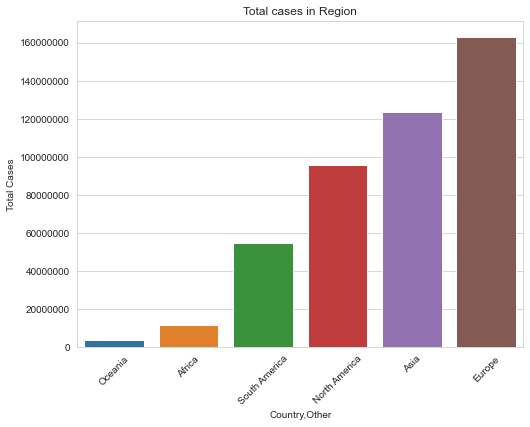

In [257]:
newest_day_df = df[df['Date'] == '2022-03-10']
continents = ['Asia', 'North America', 'South America', 'Europe', 'Africa', 'Oceania']
region_newest_day_df = newest_day_df[newest_day_df['Country,Other'].isin(continents)]
region_newest_day_df = region_newest_day_df.sort_values('Total Cases')

# Set background style
sns.set_style("whitegrid")

# Create Figure and Axes object
fig, ax = plt.subplots(figsize=[8,6])

# Vertical bar chart
sns.barplot(x='Country,Other',
            y='Total Cases',
            data=region_newest_day_df)

plt.xticks(rotation=45) # Rotate x ticks
plt.title('Total cases in Region') # Plot title
plt.ticklabel_format(style='plain', axis='y') # Change format of ticks on y axis

# Show the plot
plt.show()

**Nhận xét:**

Theo như lược đồ, ta thấy khu vực có số ca nhiễm cao nhất là Châu Âu, theo sau đó là Châu Á. Nếu như có theo dõi tình hình dịch bệnh COVID, ta sẽ biết Châu Á từng dẫn đầu số ca nhiễm nhưng bây giờ vị trí đó đã thuộc về Châu Âu. Nhiều người cho rằng lí do của việc này là do người Châu Á xử lý COVID, chấp hành các biện pháp phòng chống đại dịch tốt hơn. Những có lẻ nguyên nhân chính đến từ biến thể **Omicron** xuất hiện. **Omicron** *đã được xác nhận là chủng trội tại nhiều nước châu Âu.* Nguyên nhân khiến cho biến thể này bùng phát mạnh mẽ hơn các biến thể trước đến từ khả năng né tránh hệ miễn dịch của nó, thậm chí những người đã tiêm vaccine và tiêm liều tăng cường vẫn có tỉ lệ cao mắc phải biến chủng này.

Tiếp theo, ta thử xem top 10 quốc gia có số ca nhiễm cao nhất cũng như top 10 quốc gia có số ca tử vong cao nhất ở thời điểm hiện tại.

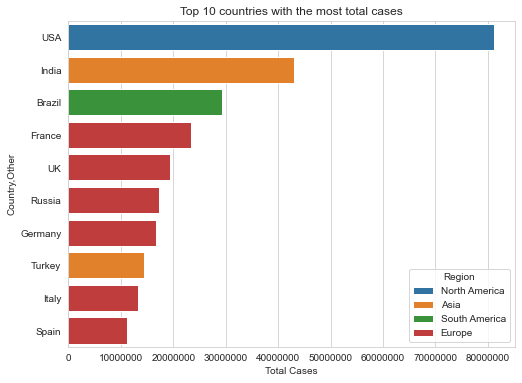

In [258]:
country_newest_day_df = newest_day_df[7:]

# Sort the dataset by descending order
# then take the first 10 rows
top10_total_cases = country_newest_day_df.sort_values('Total Cases', ascending=False).head(10)

# Set background style
sns.set_style("whitegrid")

# Create Figure and Axes object
fig, ax = plt.subplots(figsize=[8,6])

# Horizontal bar chart
# bar color represents for that country's region
sns.barplot(x='Total Cases', y='Country,Other',
            data=top10_total_cases,
            hue='Region', dodge=False,)

plt.title('Top 10 countries with the most total cases') # Chart title
plt.ticklabel_format(style='plain', axis='x') # Change format of ticks on y axis

# Show the chart
plt.show()

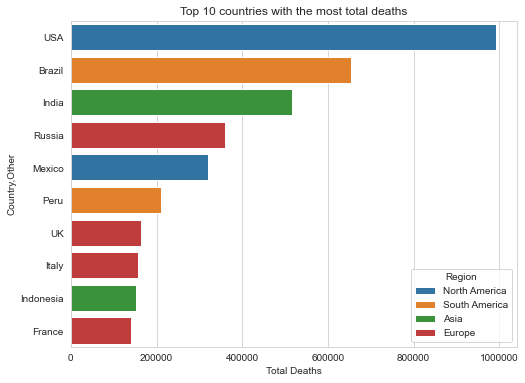

In [259]:
# Sort the dataset by descending order
# then take the first 10 rows
top10_total_cases = country_newest_day_df.sort_values('Total Deaths', ascending=False).head(10)

# Set background style
sns.set_style("whitegrid")

# Create Figure and Axes object
fig, ax = plt.subplots(figsize=[8,6])

# Horizontal bar chart
# bar color represents for that country's region
sns.barplot(x='Total Deaths', y='Country,Other',
            data=top10_total_cases,
            hue='Region', dodge=False,)

plt.title('Top 10 countries with the most total deaths') # Chart title
plt.ticklabel_format(style='plain', axis='x') # Change format of ticks on y axis

# Show the chart
plt.show()

**Nhận xét:**

- Kết quả cho thấy Mỹ có nhiều ca nhiễm COVID-19 nhất thế giới. Điều này là do người dân Mỹ rất thờ ơ với việc tiêm phòng và đeo khẩu trang, thậm chí tổng thống tiền nhiệm của quốc gia này - Donald Trump - đã từng từ chối đeo và chế nhạo những người đeo khẩu trang và kết quả là ông đã bị nhiễm COVID. 
- Ở vị trí thứ 2 trong bảng là Ấn Độ, một quốc gia tôn giáo với dân số cao. Những cuộc tụ tập tín ngưỡng ồ ạt, những nghi lễ người người chen chúc chẳng hạn mọi người tụ tập để tắm chung một dòng sông là nguyên nhân chính khiến đại dịch bùng phát ở quốc gia này. 
- Và cuối cùng, quốc gia mà ta sẽ đề cập đến là Brazil. Mặc dù tổng số ca nhiễm bệnh đứng sau Ấn Độ, nhưng việc đất nước này lại có tổng số ca tử vong đứng thứ 2 thế giới là điều tồi tệ nhất mà quốc gia này phải đối mặt. Lý do của vấn đề này thì lại liên quan đến tình hình chính trị phức tạp của Brazil nên ta sẽ không bàn ở đây.

## Số ca nhiễm mới mỗi ngày trên thế giới có liên tục tăng?

Để trả lời cho câu hỏi này, ta sẽ dùng biểu đồ đường để trực quan số ca nhiễm mới theo các ngày đã thu thập.

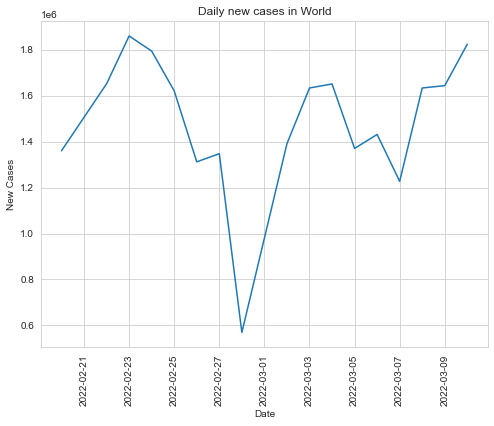

In [260]:
world_df = df[df['Country,Other'] == 'World']

# Set background style
sns.set_style("whitegrid")

# Create Figure and Axes object
fig, ax = plt.subplots(figsize=[8,6])

# Line chart
sns.lineplot(x='Date',
             y='New Cases',
             data=world_df)

plt.xticks(rotation=90) # Rotate x ticks
plt.title('Daily new cases in World') # Chart title

# Show chart
plt.show()

**Nhận xét:**

Ta có thể số ca nhiễm mới trên thế giới biến động liên tục chứ không chỉ tăng như ta nghĩ. Điều này cho ta thấy tình hình diễn biến của đại dịch vẫn còn rất phức tạp nên ta không được phép chủ quan. Để hiểu rõ, ta sẽ đi trực quan số ca nhiễm mới theo từng khu vực.

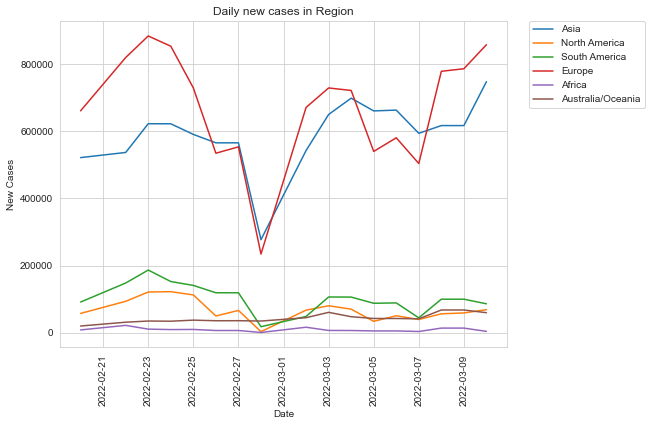

In [261]:
continents = ['Asia', 'North America', 'South America', 'Europe', 'Africa', 'Oceania']
region_df = df[df['Country,Other'].isin(continents)]

# Set background style
sns.set_style("whitegrid")

# Create Figure and Axes object
fig, ax = plt.subplots(figsize=[8,6])

# Line chart
# Each color will represent for a region
sns.lineplot(x='Date', y='New Cases',
             data=region_df,
             hue='Region')

# Move legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.xticks(rotation=90) # Rotate x ticks
plt.title('Daily new cases in Region') # Chart title

# Show chart
plt.show()

**Nhận xét:**

- Vì là 2 khu vực có tổng ca nhiễm cao nhất, số ca nhiễm mới mỗi ngày của Châu Á và Châu Âu vẫn còn rất cao. Không chỉ cao hơn các khu vực khác, số cả nhiễm mới mỗi ngày ở 2 khu vực này dao động khá mạnh, lúc tăng, lúc giảm cho ta thấy được mức độ hoành hành không lường trước được của biến chúng mới "Omicron tàng hình".
- Ở các khu vực còn lại dường như ít chịu sự tác động của biến chủng mới này, bằng chứng là số ca nhiễm mới nhìn chung khá ổn định qua từng ngày

## COVID nguy hiểm như thế nào?

Đã bao giờ bạn tự hỏi: *"Nếu bị nhiễm COVID, liệu tôi sẽ chết?"*. Để trả lời cho câu hỏi này, hãy nhìn vào biểu đồ tròn phía dưới:

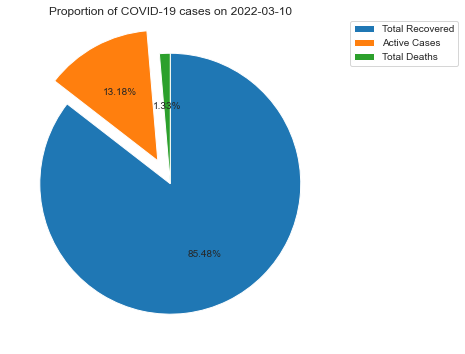

Total cases: 453362851


In [262]:
newest_day_df = df[df['Date'] == '2022-03-10']
world_newest_day_df = newest_day_df[newest_day_df['Country,Other'] == 'World']

# Set color matplotlib as seaborn color
colors = sns.color_palette()

# Create Figure and Axes object
fig, ax = plt.subplots(figsize=[8,6])

# Explode 1 slice for easier looking
explode = (0, 0.2, 0)

# Pie chart
plt.pie(world_newest_day_df[['Total Recovered', 'Active Cases', 'Total Deaths']].values[0],
        autopct='%.2f%%',
        explode=explode,
        startangle=90,
        counterclock=False)

# Move  legend to the upper right of the pie chart
plt.legend(['Total Recovered', 'Active Cases', 'Total Deaths'],
          bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.title('Proportion of COVID-19 cases on 2022-03-10') # Chart title

# Show chart
plt.show()

# Show the total cases
print("Total cases:", world_newest_day_df['Total Cases'].values[0])

**Nhận xét:**

Kết quả trả về cho thấy tỷ lệ tổng số ca hồi phục vẫn chiếm ưu thế so với tổng số ca tử vong. Nhưng ta cũng nên cảnh giác rằng con số 1.33% không phải là nhỏ và kể từ khi bùng phát đại dịch đến thời điểm này, đã có tổng cộng 453 triệu trường hợp mắc bệnh, tức là khoảng 6 triệu nạn nhân không may đã qua đời trong đợt đại dịch này. Bây giờ ta sẽ đi sâu vào chi tiết từng khu vực:

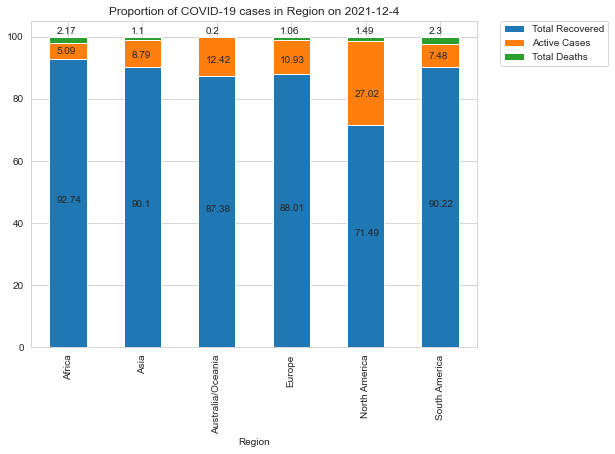

In [263]:
newest_day_df = df[df['Date'] == '2022-03-10']
continents = ['Asia', 'North America', 'South America', 'Europe', 'Africa', 'Oceania']
region_newest_day_df = newest_day_df[newest_day_df['Country,Other'].isin(continents)]

# Create pivot table that take region as index
# Columns are 'Total Recovered', 'Active Cases', 'Total Deaths'
# and values are sum of column by region
table = pd.pivot_table(region_newest_day_df, values=['Total Recovered', 'Active Cases', 'Total Deaths'], index='Region')

# Normalize each row
total = table['Total Recovered'] + table['Active Cases'] + table['Total Deaths']
table = table[['Total Recovered', 'Active Cases', 'Total Deaths']].apply(lambda x: round(x/total*100, 2))

# Plot stacked percent bar chart
table.plot(kind='bar', stacked=True, figsize=(8,6))

# Annotate percent
nrow = len(table)
ncol = len(table.columns)

for r in range(nrow):
    cumsum_proportion = table.iloc[r].cumsum() # Get cumsum of the row
    
    for c in range(ncol):
        proportion = table.iloc[r, c] # Get proportion
        
        if c == 0: # Percent of total recovered
            plt.text(x=r - 0.15,
                     y=proportion/2, 
                     s=proportion)
        elif c == 1: # Percent of active cases
            plt.text(x=r - 0.15,
                     y=cumsum_proportion[c] - proportion/1.5,
                     s=proportion)
        else: # Percent of total deaths
            plt.text(x=r - 0.15,
                     y=101,
                     s=proportion)

plt.title('Proportion of COVID-19 cases in Region on 2021-12-4') # Chart title

# Move  legend to the upper right of the pie chart
plt.legend(['Total Recovered', 'Active Cases', 'Total Deaths'],
          bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Show chart
plt.show()

**Nhận xét:**

Qua biểu đồ trên ta thấy tỉ lệ số ca đang nhiễm ở khu vực Bắc Mỹ vẫn còn rất cao, lên đến tận 27%. Ngoài ra, biểu đồ còn thể hiện việc mặc dù có tỉ lệ hồi phục cao nhưng hai khu vực Châu Phi và Nam Mỹ lại có tỉ lệ tử vong cao hơn các khu vực khác. Điều này nói lên việc thiếu thốn và hạn chế trong cơ sở hạ tầng về y tế của các nước trong khu vực này. Nhưng tóm lại, nhìn chung tỉ lệ các ca hồi phục vẫn còn chiếm ưu thế ở các khu vực là một tín hiệu tốt cho chúng ta.

## Giữa các trường dữ liệu số có mối liên hệ nào không

Để nhanh chóng tìm ra mối tương quan giữa các trường dữ liệu này, ta sẽ dùng ma trận hệ số tương quan kết hợp với trực quan bằng Heatmap.

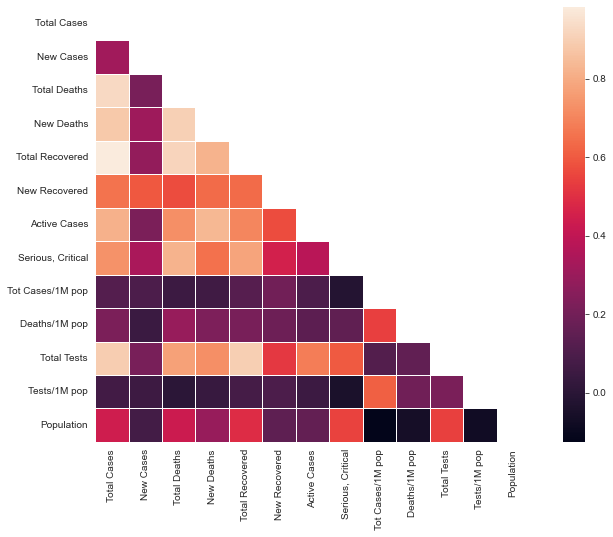

In [264]:
newest_day_df = df[df['Date'] == '2022-03-10']
country_newest_day_df = newest_day_df[7:]

corr = country_newest_day_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=[12,8])
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8)

plt.show()

**Nhận xét:**

Miền giá trị Heatmap trả về từ 0 đến 1 cho ta thấy đa số các cặp thuộc tính đều có mối tương quan dương với nhau. Các cột có hệ số tương quan thấp dường như là các cột có yếu tố dân số trong đó. Bây giờ ta thử đi trả lời cho câu hỏi "Nếu số ca nhiễm mới cao thì số ca tử vong có cao theo không" thông qua biểu đồ scatter. 

**Lưu ý:** ta sẽ trực quan sau khi đã log scale hai trục để thấy rõ sự tương quan hơn.

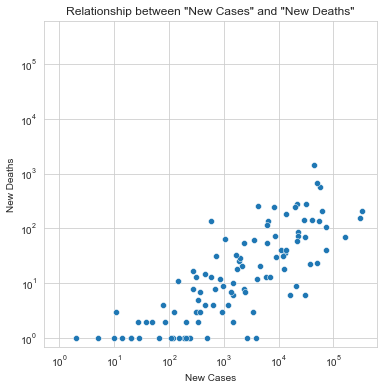

In [265]:
# Create Figure and Axes object
fig, ax = plt.subplots(figsize=[8,6])

# Scatter plot
g = sns.scatterplot(x='New Cases',
                y='New Deaths', 
                data=country_newest_day_df)

# Logarithmic scale on both axes
g.set_xscale('log')
g.set_yscale('log')

plt.title('Relationship between "New Cases" and "New Deaths"') # Chart title
plt.axis('square')
# Show chart
plt.show()

**Nhận xét:**

Câu trả lời là có nhưng đừng vì thế mà ta quá lo lắng vì mặc dù khi số ca nhiễm mới tăng, số ca tử vong cũng tăng nhưng với tốc độ không quá cao. Bây giờ để nhanh chóng thể hiện sự tương quan giữa các cặp biến còn lại, ta sẽ dùng correlogram với log scale ở hai trục.

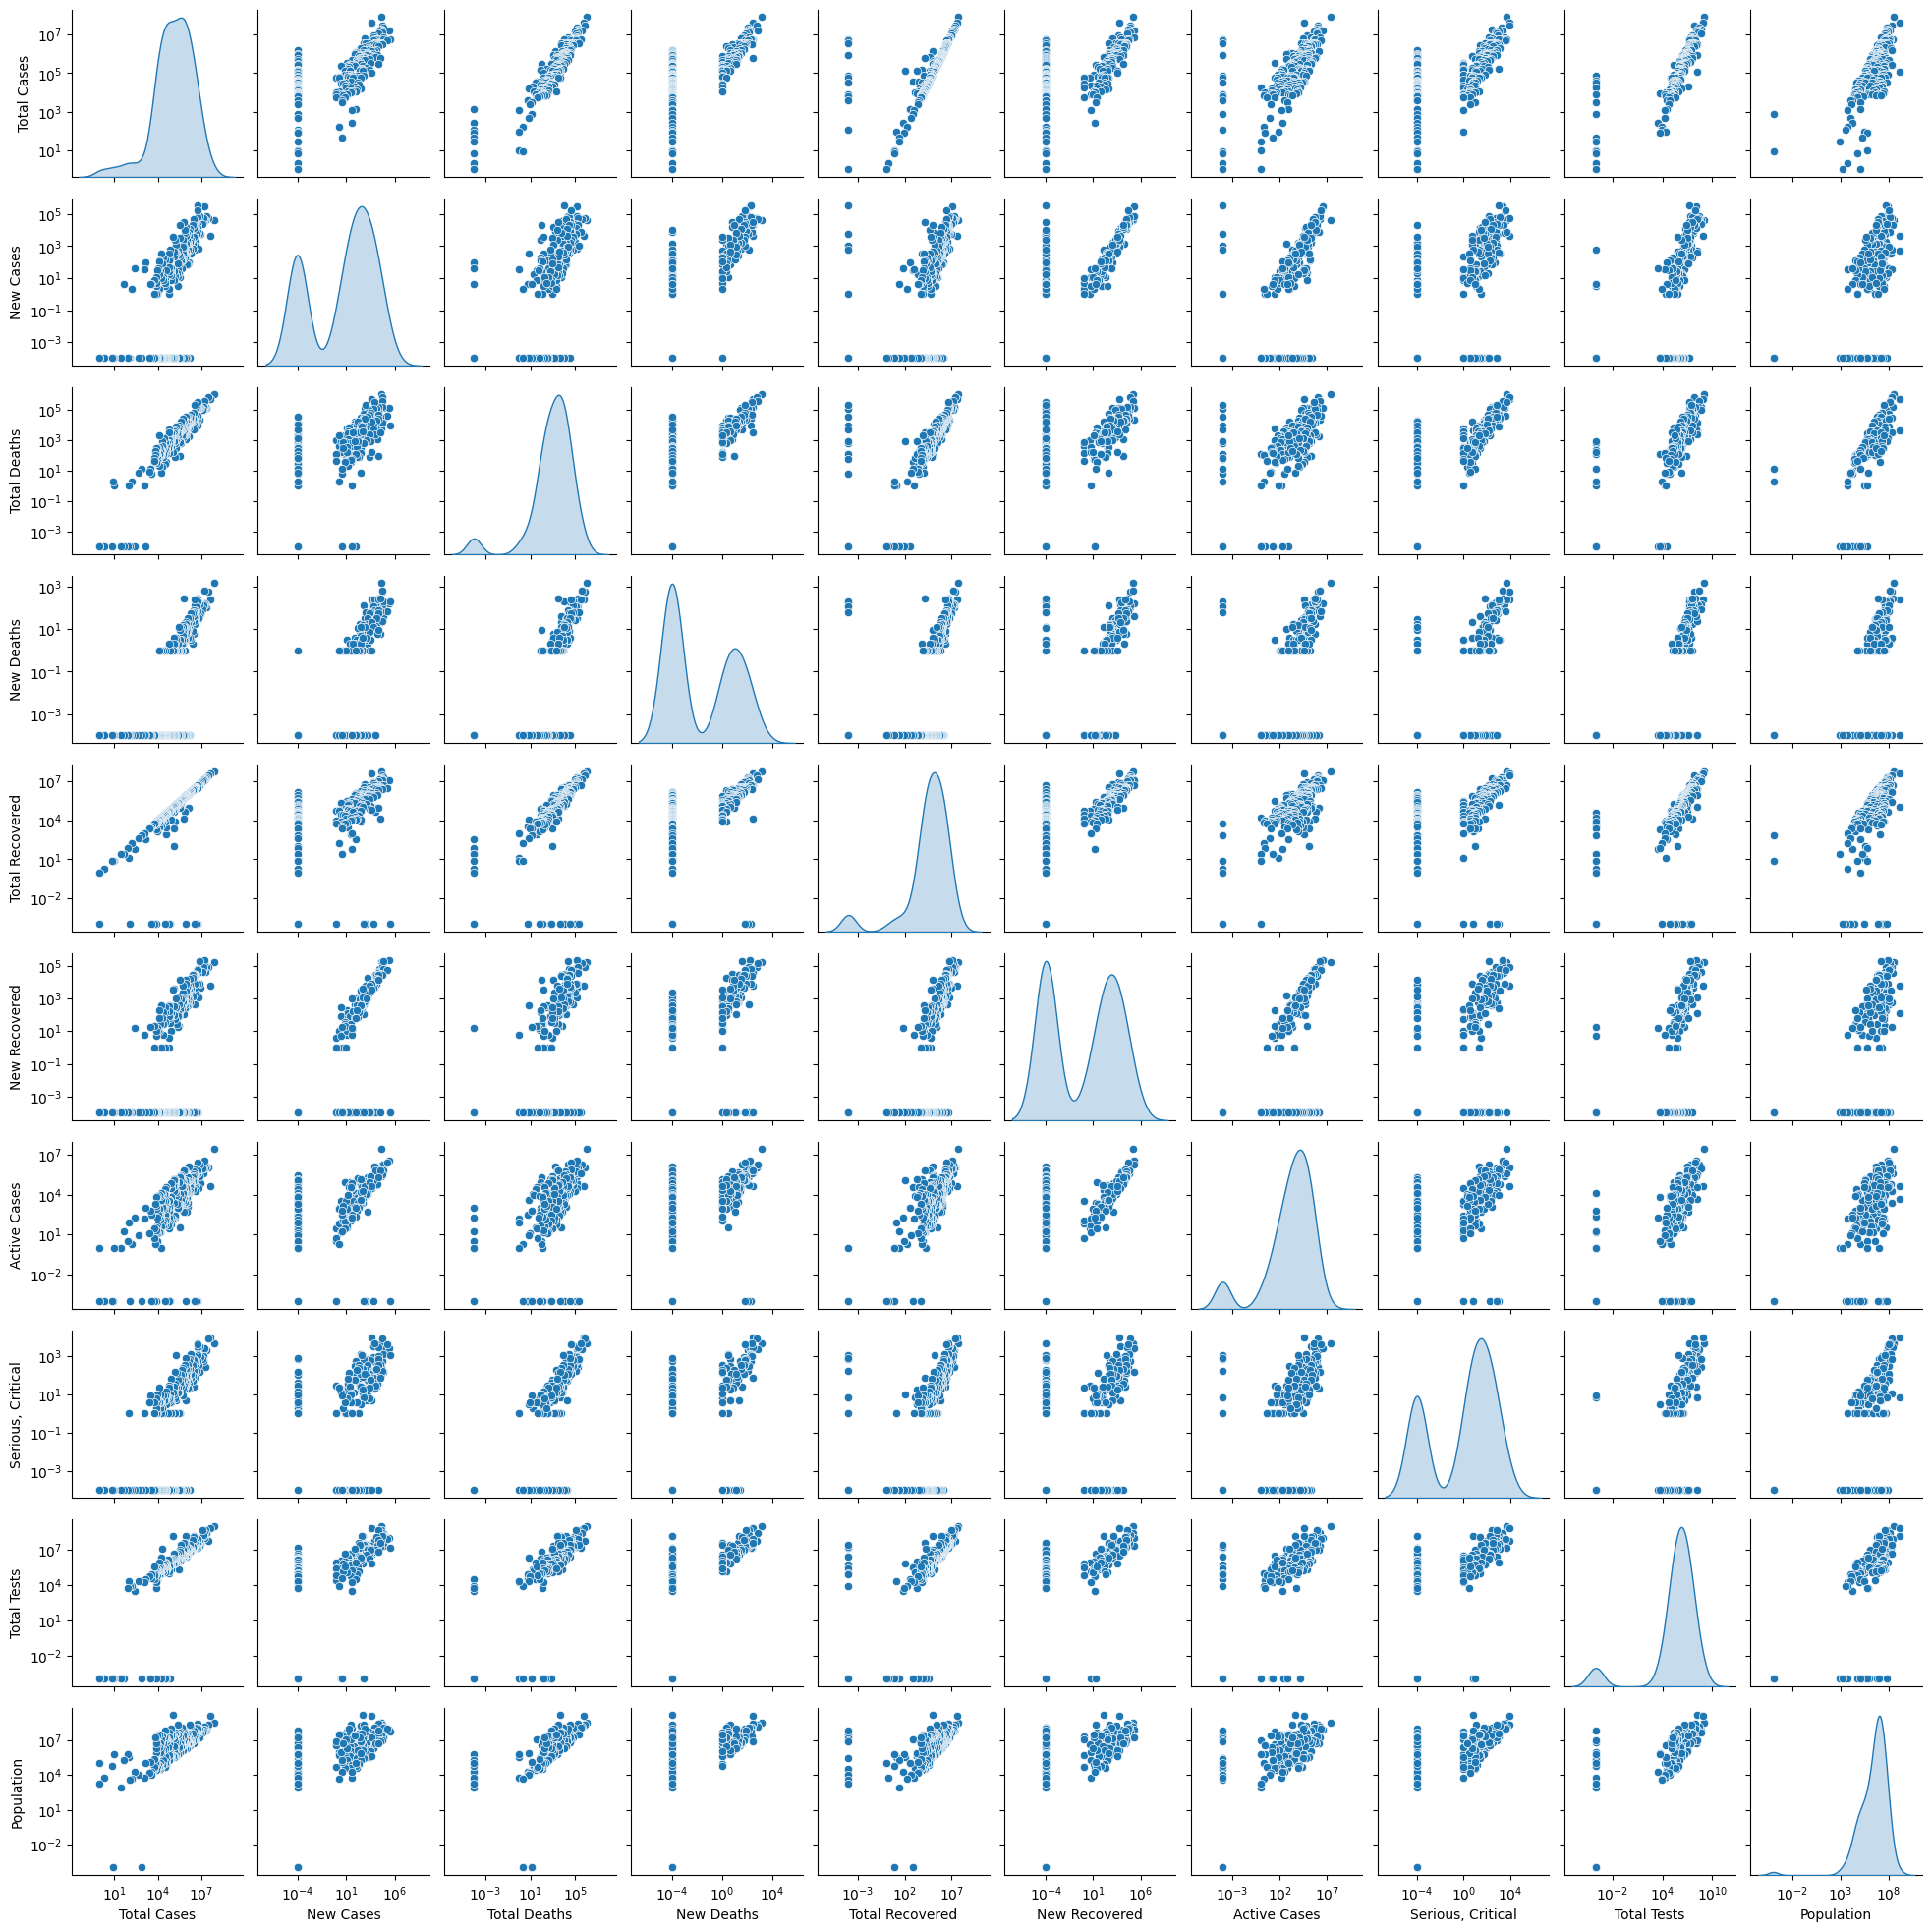

In [266]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = country_newest_day_df.select_dtypes(include=numerics)
exclude_cols = ['Tot Cases/1M pop', 'Deaths/1M pop', 'Tests/1M pop'] # Đơn vị khác so với các cột còn lại
numeric_df = numeric_df.drop(exclude_cols, axis=1)

sns.reset_defaults()

# Add very small number to each cell to make log scale available
numeric_df += 0.0001

# Correlogram
g = sns.pairplot(data=numeric_df, diag_kind = "kde", 
             diag_kws = {'log_scale':True})
g.fig.set_size_inches(20,20)
g.set(xscale='log', yscale='log')  # Scale logarithmic on both axes    

# Show chart
plt.show()

**Nhận xét:**

Kết quả trả về đúng như dự đoán, phần lớn các cặp trường dữ liệu có tương quan dương với nhau. Thậm chí nếu nhìn vào hai trường **Total Cases** và **Total Recovered**, ta thấy sự tương quan của chúng là tuyến tính dương khi các điểm gần như nằm trên một đường thẳng, củng cố thêm vào nhận xét tỉ lệ số ca hồi phục vẫn chiếm ưu thế trên tổng số ca nhiễm.

# Xây dựng mô hình dự đoán số ca nhiễm mới

In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import smtplib
import pmdarima as pm

from datetime import datetime, timedelta
from email.message import EmailMessage
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [268]:
world_df = df[df['Country,Other'] == 'World']
time_series = world_df[['Date', 'New Cases']].set_index('Date').sort_values('Date')
time_series

,New Cases
Date,
2022-02-20,1360313
2022-02-22,1651884
2022-02-23,1860146
2022-02-24,1794296
2022-02-25,1620803
2022-02-26,1312070
2022-02-27,1347649
2022-02-28,569285
2022-03-02,1391084


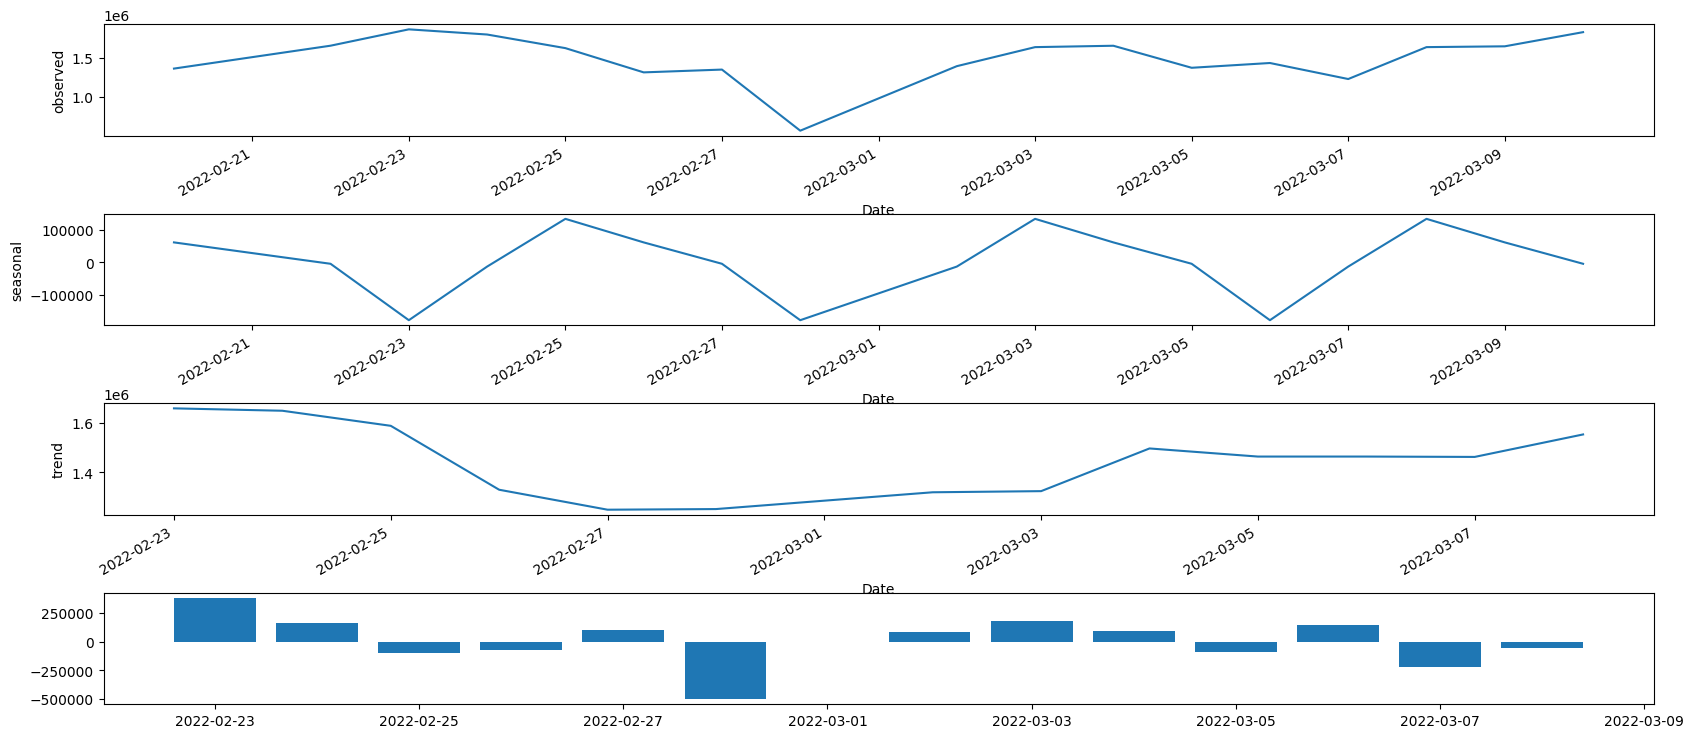

In [269]:
decomp = seasonal_decompose(time_series, period=5)

observed = decomp.observed
seasonal = decomp.seasonal
trend = decomp.trend
residual = decomp.resid

decomp_df = pd.DataFrame({"observed":observed, "seasonal":seasonal, "trend":trend, "residual":residual})

fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20, 10))
plt.subplots_adjust(hspace=0.7)

for i, ax in enumerate(axes):
    if i == len(axes)-1:
        continue
    ax = decomp_df.iloc[:,i].plot(ax=ax)
    ax.set_ylabel(decomp_df.iloc[:,i].name)


axes[-1].bar(decomp_df.index, decomp_df['residual'])
    
plt.show()

c:\users\chung\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


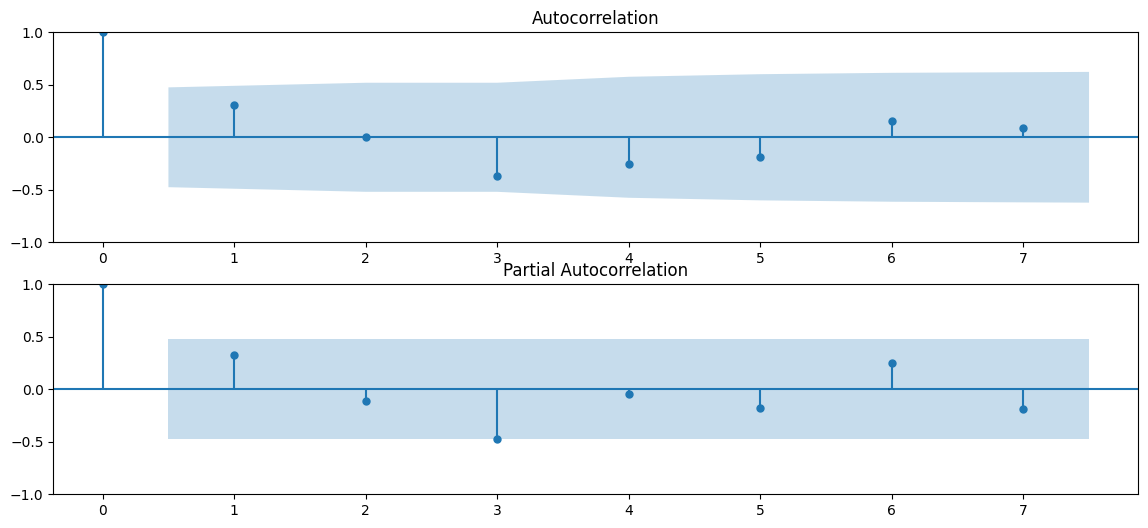

In [270]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,6), sharex=False, sharey=False)
ax1 = plot_acf(time_series, lags=len(time_series)/2-1, ax=ax1)
ax2 = plot_pacf(time_series, lags=len(time_series)/2-1, ax=ax2)
plt.show()

In [271]:
result = adfuller(time_series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Test Statistics Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.521555
p-value: 0.110317
Critical Test Statistics Values:
	1%: -3.924
	5%: -3.068
	10%: -2.674


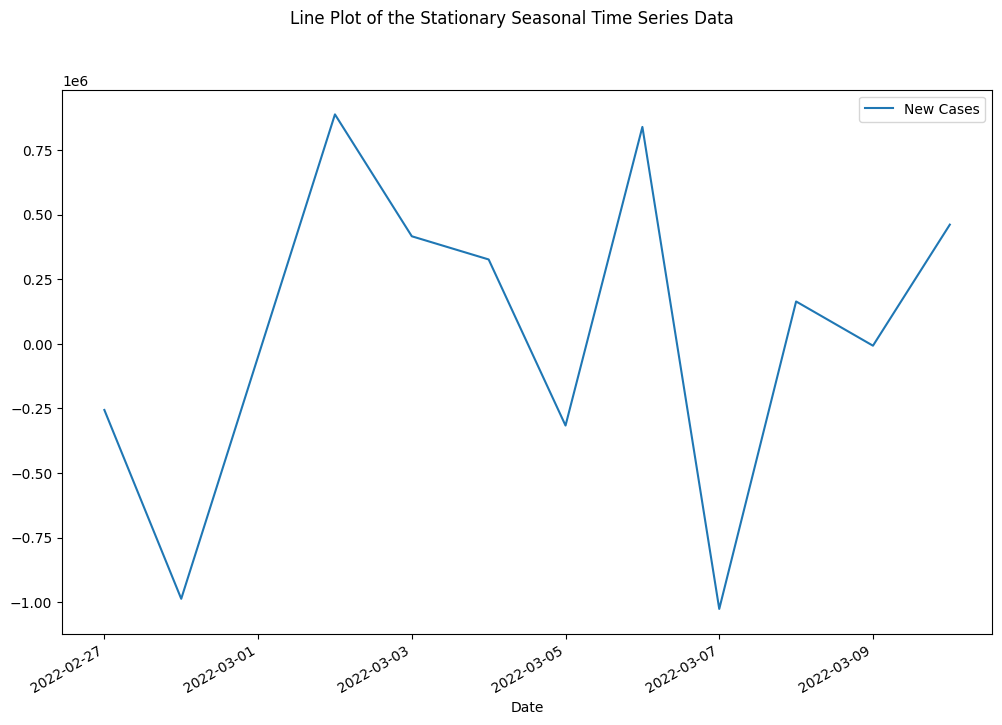

In [281]:
time_series_diff = time_series.diff().diff(5)
time_series_diff.dropna(inplace=True)

# Plot differenced data
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Line Plot of the Stationary Seasonal Time Series Data')
time_series_diff.plot(ax=ax)
plt.show()

In [282]:
result = adfuller(time_series_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Test Statistics Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.174091
p-value: 0.000729
Critical Test Statistics Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749


c:\users\chung\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


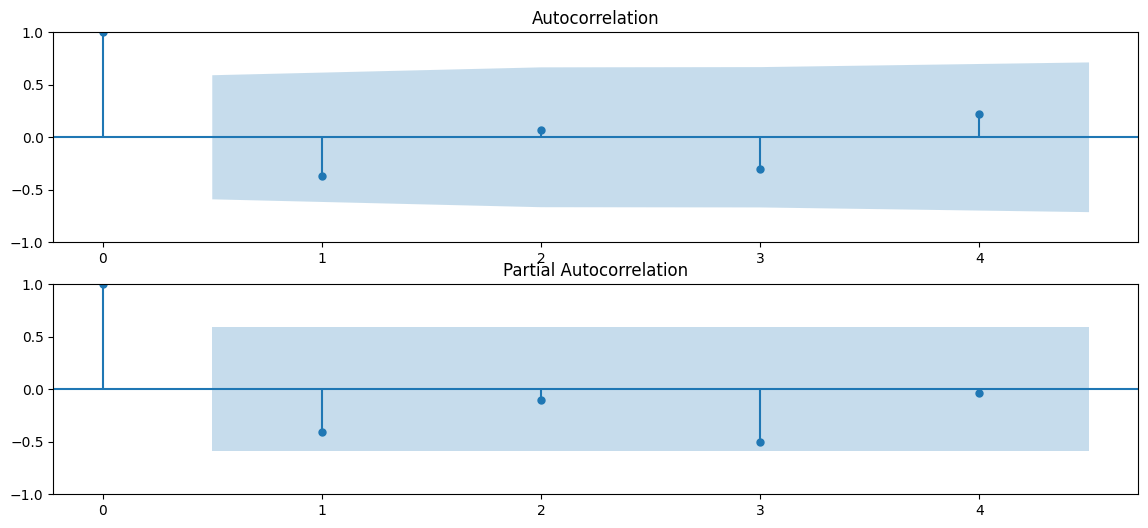

In [283]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,6), sharex=False, sharey=False)
ax1 = plot_acf(time_series_diff, lags=len(time_series_diff)/2-1, ax=ax1)
ax2 = plot_pacf(time_series_diff, lags=len(time_series_diff)/2-1, ax=ax2)
plt.show()

In [284]:
model = pm.auto_arima(time_series['New Cases'], d=1, D=1,
                      seasonal=True, m=5, trend='c',start_p=0, start_q=0, 
                      max_order=6, test='adf', stepwise=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[5]             : AIC=328.366, Time=0.06 sec
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=328.514, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=328.608, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=331.762, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[5]             : AIC=326.521, Time=0.03 sec
 ARIMA(0,1,0)(0,1,2)[5]             : AIC=328.430, Time=0.05 sec
 ARIMA(0,1,0)(1,1,0)[5]             : AIC=326.977, Time=0.03 sec
 ARIMA(0,1,0)(1,1,2)[5]             : AIC=330.318, Time=0.21 sec
 ARIMA(1,1,0)(0,1,1)[5]             : AIC=328.231, Time=0.04 sec
 ARIMA(1,1,1)(0,1,1)[5]             : AIC=327.782, Time=0.18 sec
 ARIMA(0,1,0)(0,1,1)[5] intercept   : AIC=326.521, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,1,1)[5] intercept
Total fit time: 0.726 seconds
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:   

In [285]:
#divide into train and validation set
train = time_series[:int(0.7*(len(time_series)))]
test = time_series[int(0.7*(len(time_series))):]

# Build model
model = SARIMAX(train['New Cases'],order=(0,1,0),seasonal_order=(0,1,1,5))
results = model.fit()
print("Results of SARIMAX on train")
print(results.summary())

Results of SARIMAX on train
                                      SARIMAX Results                                      
Dep. Variable:                           New Cases   No. Observations:                   11
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 5)   Log Likelihood                 -73.513
Date:                             Sat, 19 Mar 2022   AIC                            151.026
Time:                                     16:15:34   BIC                            150.245
Sample:                                          0   HQIC                           148.929
                                              - 11                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L5       -0.5984      1.395     -0.429      0.668      -3.332       2.136

c:\users\chung\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\chung\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\chung\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


c:\users\chung\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


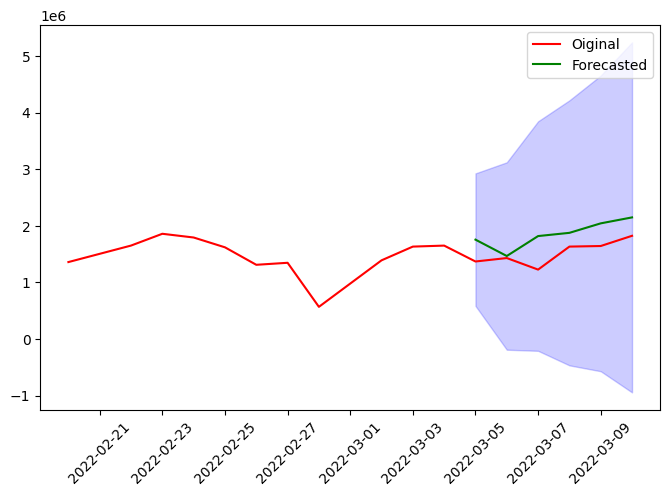

In [286]:
#Checking prediction value with test
forecast = results.get_forecast(steps=len(test))
mean = forecast.predicted_mean
conf_int = forecast.conf_int()
d = mean.index
plt.figure(figsize=(8,5))
# Plot past  levels
plt.plot(time_series.index, time_series['New Cases'], label='Oiginal', color = 'red')
# Prediction Mean
plt.plot(test.index, mean, label='Forecasted', color= 'green')
# Shade of space between  confidence intervals
plt.fill_between(test.index, conf_int.iloc[:,0], conf_int.iloc[:,1],
alpha=0.2, color= 'blue')

plt.xticks(rotation=45)

# Plot legend 
plt.legend()
plt.show()

In [287]:
next_14_days = [train.index[-1] + timedelta(days=i) for i in range(1,15)]
next_14_days

[Timestamp('2022-03-05 00:00:00'),
 Timestamp('2022-03-06 00:00:00'),
 Timestamp('2022-03-07 00:00:00'),
 Timestamp('2022-03-08 00:00:00'),
 Timestamp('2022-03-09 00:00:00'),
 Timestamp('2022-03-10 00:00:00'),
 Timestamp('2022-03-11 00:00:00'),
 Timestamp('2022-03-12 00:00:00'),
 Timestamp('2022-03-13 00:00:00'),
 Timestamp('2022-03-14 00:00:00'),
 Timestamp('2022-03-15 00:00:00'),
 Timestamp('2022-03-16 00:00:00'),
 Timestamp('2022-03-17 00:00:00'),
 Timestamp('2022-03-18 00:00:00')]

c:\users\chung\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


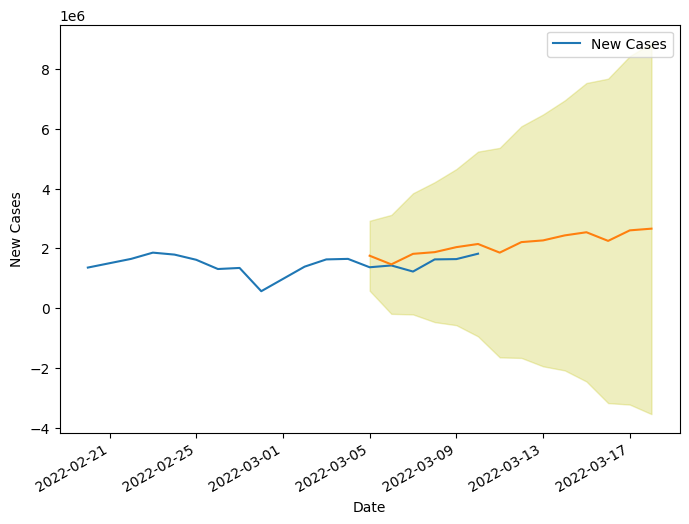

In [288]:
#Future Forecast
future = results.get_forecast(steps=14)
ci = future.conf_int()
ax = time_series.plot(label='New Cases', figsize=(8, 6))
plt.plot(next_14_days, future.predicted_mean)
ax.fill_between(next_14_days,
                ci.iloc[:, 0],
                ci.iloc[:, 1], color='y', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('New Cases')
plt.legend()
plt.show()

# Tham khảo

https://vnexpress.net/omicron-thanh-chung-troi-o-phap-4410801.html \
https://thanhnien.vn/vi-sao-omicron-lay-lan-voi-toc-do-chong-mat-post1417375.html